In [1]:
import tensorflow as tf

def parse_tfrecord(example_proto):
    # Define the expected structure of your TFRecord data
    feature_description = {
        'images': tf.io.FixedLenFeature([], tf.string),  # Images stored as raw byte strings
        'objectIds': tf.io.FixedLenFeature([], tf.string),  # Object IDs stored as byte strings
        'candids': tf.io.FixedLenFeature([], tf.int64),  # Candid numbers as int64
        'features': tf.io.FixedLenFeature([], tf.string),  # Features stored as raw byte strings
    }
    # Parse the input tf.train.Example proto using the dictionary above
    features = tf.io.parse_single_example(example_proto, feature_description)

    # Decode the images and features correctly
    images = tf.io.parse_tensor

    # Decode the images and features correctly
    images = tf.io.parse_tensor(features['images'], out_type=tf.float32)  # Assuming images were saved as float32
    images = tf.reshape(images, shape=(3, 63, 63))  # Adjust shape as necessary

    # Here, ensure the type matches how features were stored. If they were stored as float64, parse as float64:
    features_decoded = tf.io.parse_tensor(features['features'], out_type=tf.float64)  # Adjust if stored as float64

    # Return images and other metadata
    return images, features['objectIds'], features['candids'], features_decoded


def read_tfrecords(file_path):
    # Create a dataset object from the TFRecord file
    dataset = tf.data.TFRecordDataset(file_path)

    # Map the parsing function to each element in the dataset
    dataset = dataset.map(parse_tfrecord)

    return dataset




2024-09-17 12:16:13.443291: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9373] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-17 12:16:13.444661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-17 12:16:13.615932: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1534] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-17 12:16:13.942522: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#!pip install matplotlib

Image shape: (3, 63, 63)


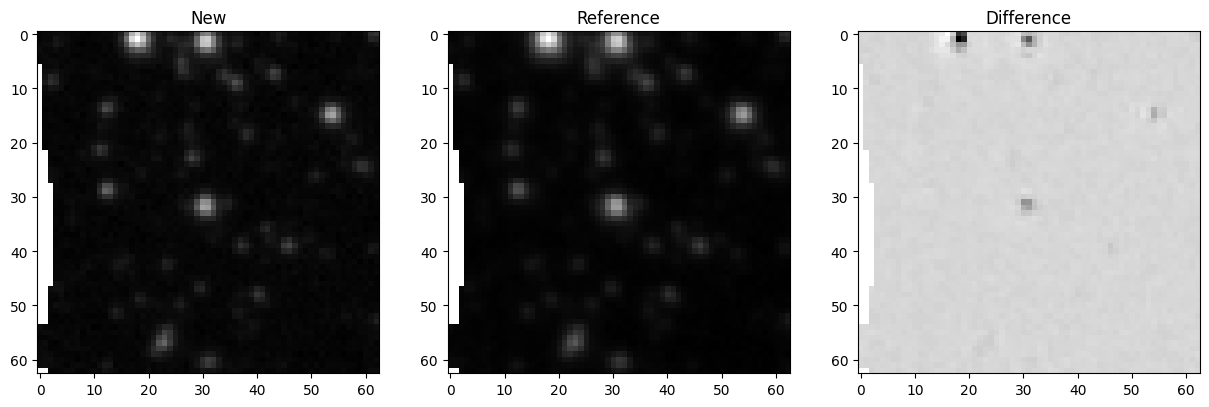

Object ID: ZTF19abfekyt
Candid: 919314323115010113
Features shape: (21,)
Sample features: 0.0
Image shape: (3, 63, 63)


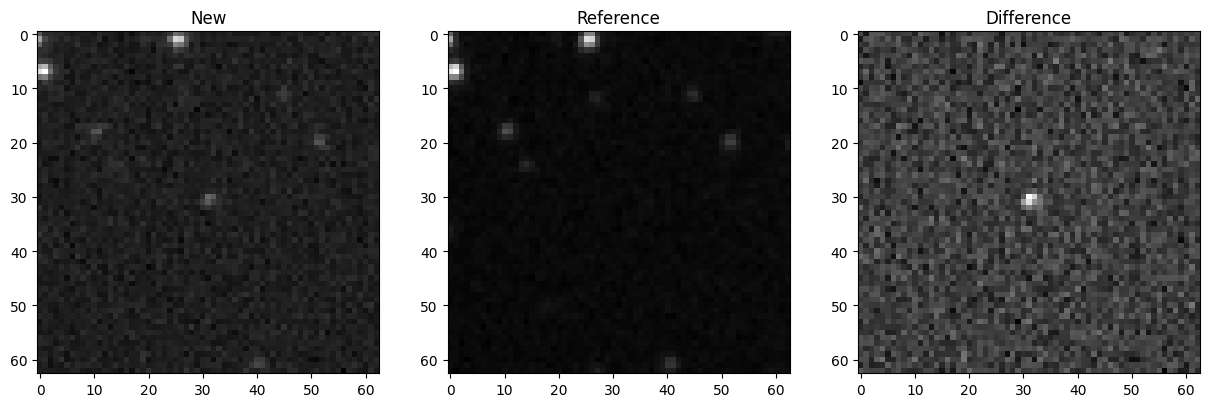

Object ID: ZTF19abffkgt
Candid: 919355824015015023
Features shape: (21,)
Sample features: 1.0


In [2]:
# Specify the path to your TFRecord file
tfrecord_file = '/jet/home/fstoppa/tmp_ondemand_ocean_phy240031p_symlink/shared/TFRecords/data_batch_1_1.tfrecord'

# Function to read the TFRecord file (assuming read_tfrecords is defined)
dataset = read_tfrecords(tfrecord_file)

import matplotlib.pyplot as plt
import numpy as np

# Iterate over the first few records and print the content
for images, objectIds, candids, features in dataset.take(2):  # Adjust `.take()` for more samples
    print("Image shape:", images.shape)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        
    axs[0].imshow(np.log10(images[0,:,:]), cmap='gray')
    axs[0].set_title("New")
    
    axs[1].imshow(np.log10(images[1,:,:]), cmap='gray')
    axs[1].set_title("Reference")
    
    axs[2].imshow(images[2,:,:], cmap='gray')
    axs[2].set_title("Difference")
    
    plt.show()
    
    print("Object ID:", objectIds.numpy().decode('utf-8'))
    print("Candid:", candids.numpy())
    print("Features shape:", features.shape)
    print("Sample features:", features.numpy()[-1])  # Print first few elements of features


In [12]:
import astropy

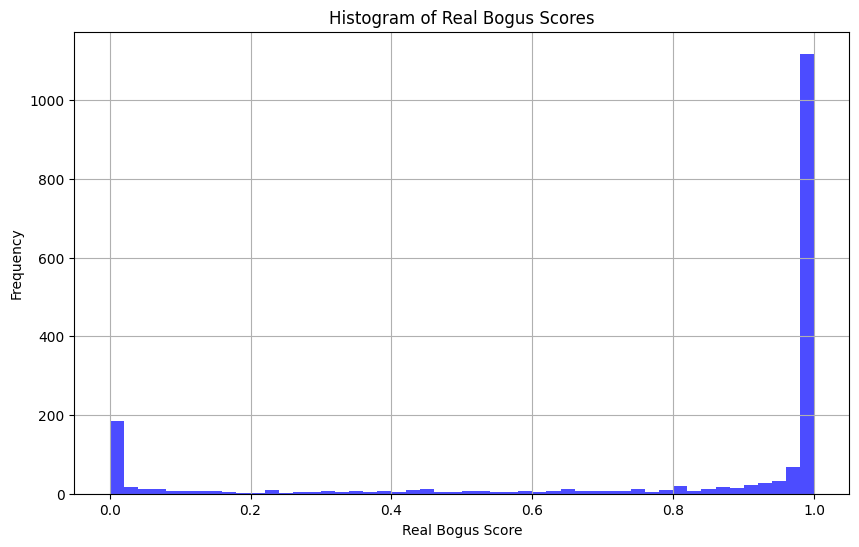

In [3]:

# Specify the path to your TFRecord file
tfrecord_file = '/jet/home/fstoppa/tmp_ondemand_ocean_phy240031p_symlink/shared/TFRecords/data_batch_1_0.tfrecord'

# Function to read the TFRecord file
dataset = read_tfrecords(tfrecord_file)

# Initialize a list to store all real bogus scores
real_bogus_scores = []

# Iterate over the full dataset to collect the real bogus scores
for images, objectIds, candids, features in dataset:
    real_bogus_scores.append(features.numpy()[1])  # Assuming the second feature is the real bogus score

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(real_bogus_scores, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Real Bogus Scores')
plt.xlabel('Real Bogus Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:

# Specify the path to your TFRecord file
tfrecord_file = '/jet/home/fstoppa/tmp_ondemand_ocean_phy240031p_symlink/shared/TFRecords/data_batch_1_6.tfrecord'

# Function to read the TFRecord file
dataset = read_tfrecords(tfrecord_file)

# Initialize a list to store all real bogus scores and corresponding images
real_bogus_scores = []
images_list = []
objectIds_list = []
candids_list = []

# Iterate over the full dataset to collect the real bogus scores and corresponding data
for images, objectIds, candids, features in dataset:
    score = features.numpy()[1]  # Assuming the second feature is the real bogus score
    real_bogus_scores.append(score)
    images_list.append(images.numpy())
    objectIds_list.append(objectIds.numpy())
    candids_list.append(candids.numpy())

# Convert to numpy arrays for easier processing
real_bogus_scores = np.array(real_bogus_scores)
images_list = np.array(images_list)
objectIds_list = np.array(objectIds_list)
candids_list = np.array(candids_list)

# Find indices of the top 5 closest to 0 and top 5 closest to 1
top_5_closest_to_zero_indices = np.argsort(np.abs(real_bogus_scores - 0))[:15]
top_5_closest_to_one_indices = np.argsort(np.abs(real_bogus_scores - 1))[:15]

# Function to plot images
def plot_images(images, title):
    
    zscale = ZScaleInterval()

    def scale_image(image):
        vmin, vmax = zscale.get_limits(image)
        image = np.clip(image, vmin, vmax)
        image = 255 * (image - vmin) / (vmax - vmin)
        return image
    
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        
    axs[0].imshow(scale_image(images[0,:,:]), cmap='gray')
    axs[0].set_title("New")
    
    axs[1].imshow(scale_image(images[1,:,:]), cmap='gray')
    axs[1].set_title("Reference")
    
    axs[2].imshow(scale_image(images[2,:,:]), cmap='gray')
    axs[2].set_title("Difference")
    
    fig.suptitle(title)
    plt.show()



In [33]:
# # Plot the images for the top 5 closest to 0
# for idx in top_5_closest_to_zero_indices:
#     plot_images(images_list[idx], f"Object ID: {objectIds_list[idx].decode('utf-8')}, Candid: {candids_list[idx]}, Score: {real_bogus_scores[idx]}")



In [34]:
# # Plot the images for the top 5 closest to 1
# for idx in top_5_closest_to_one_indices:
#     plot_images(images_list[idx], f"Object ID: {objectIds_list[idx].decode('utf-8')}, Candid: {candids_list[idx]}, Score: {real_bogus_scores[idx]}")

In [35]:
### SAVE IMAGES INTO .npy FILE

# Initialize lists to store images and real bogus scores
all_images = []
real_bogus_scores = []

# Iterate over the dataset to collect images and scores
for images, objectIds, candids, features in dataset:
    score = features.numpy()[1]  # Assuming the second feature is the real bogus score
    
    # Append the original images and binary score
    all_images.append(images.numpy())
    real_bogus_scores.append(score)

# Convert lists to numpy arrays
all_images = np.array(all_images)
real_bogus_scores = np.array(real_bogus_scores)

# Save the images and scores to .npy files
np.save('ZTF_images_6.npy', all_images)
np.save('ZTF_real_bogus_scores_6.npy', real_bogus_scores)



Loaded 2048 images.
Loaded 2048 real bogus scores.


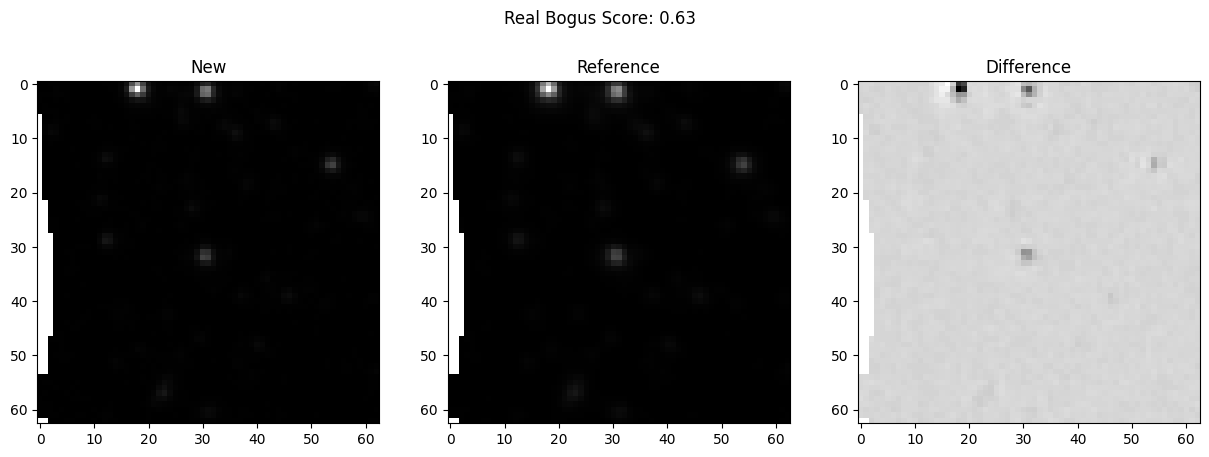

Image 1 Real Bogus Score: 0.63


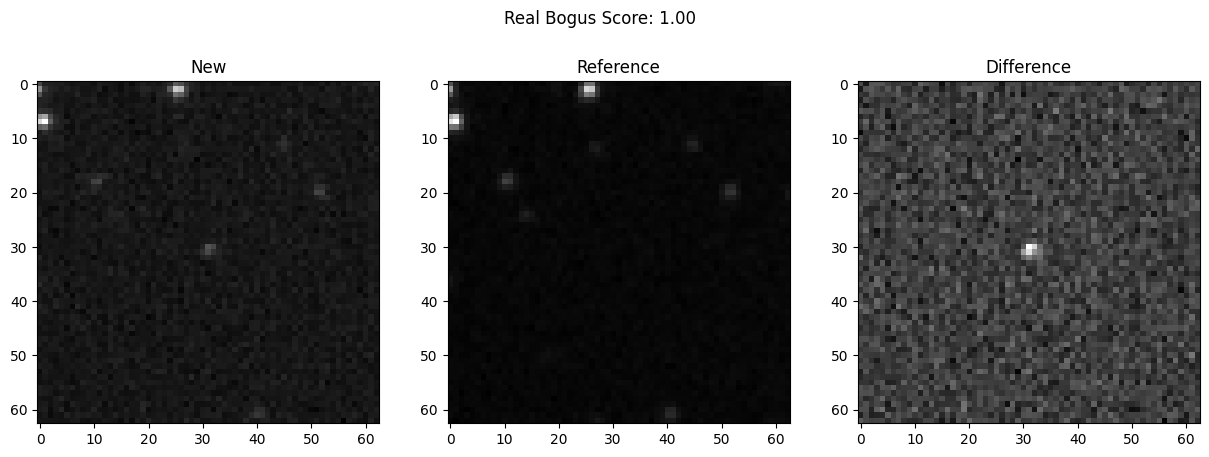

Image 2 Real Bogus Score: 1.00


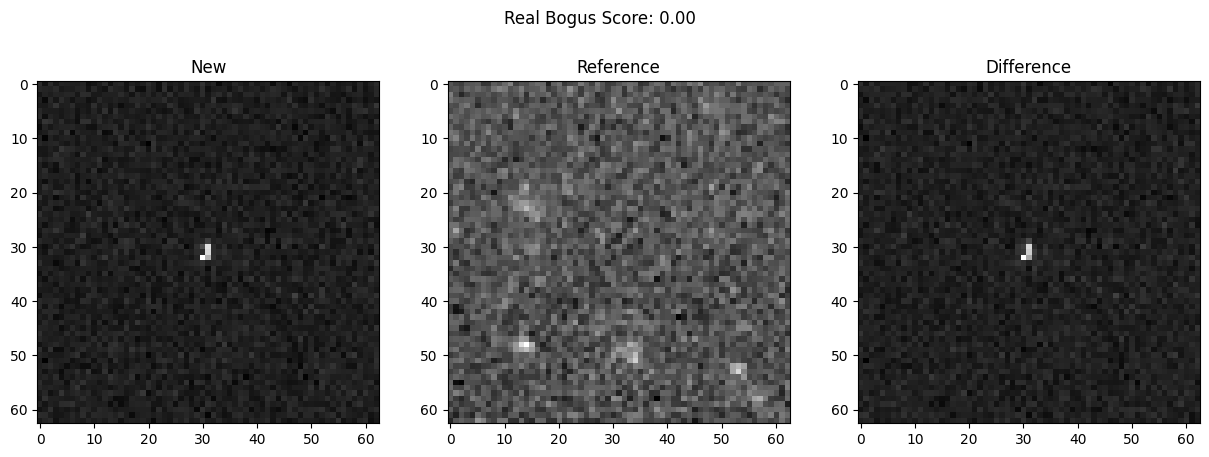

Image 3 Real Bogus Score: 0.00


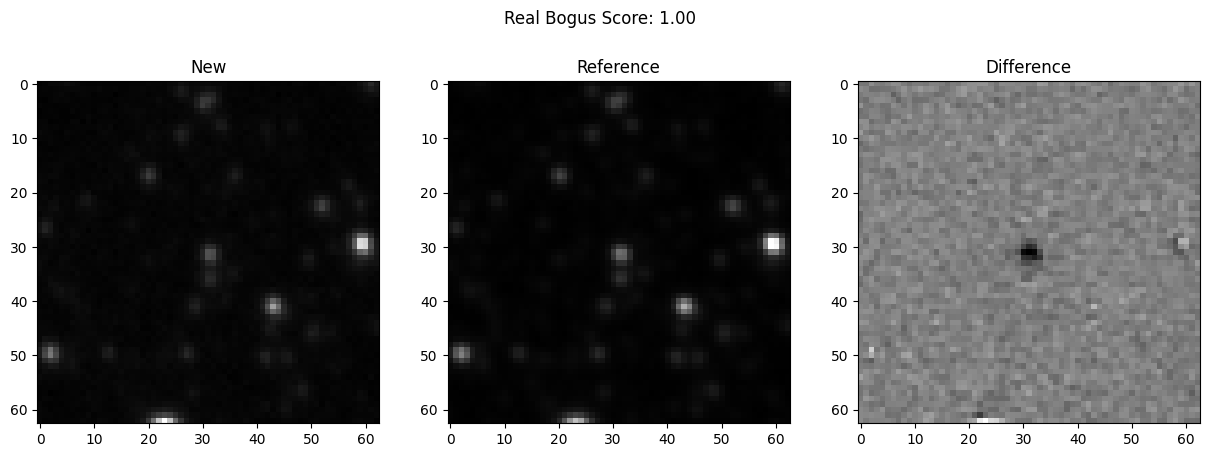

Image 4 Real Bogus Score: 1.00


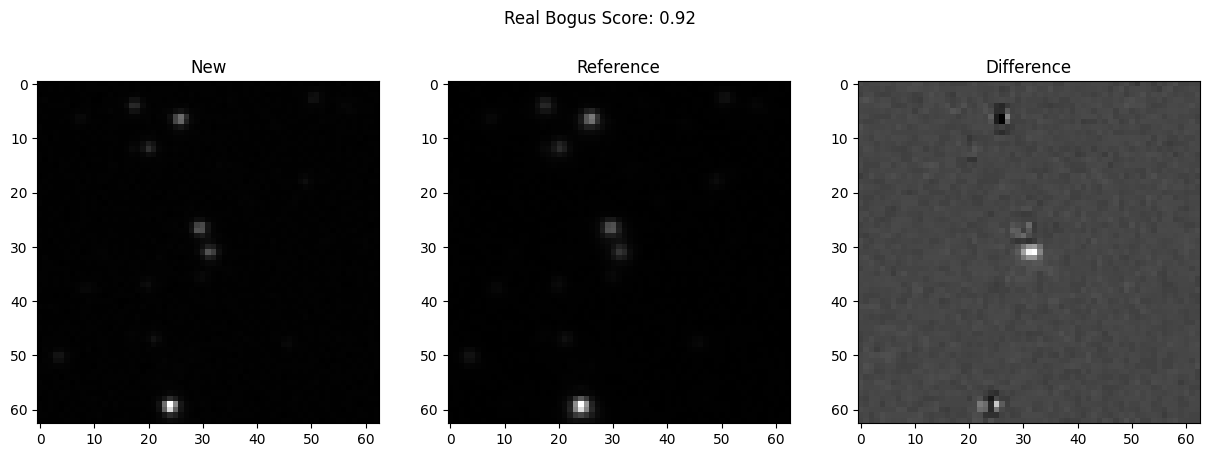

Image 5 Real Bogus Score: 0.92


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved .npy files
images = np.load('ZTF_images.npy')
real_bogus_scores = np.load('ZTF_real_bogus_scores.npy')

# Check that the images and scores have been loaded correctly
print(f"Loaded {images.shape[0]} images.")
print(f"Loaded {real_bogus_scores.shape[0]} real bogus scores.")

# Plot the first 5 images and print their scores
for i in range(5):
    image_triplet = images[i]  # Get the triplet of images (New, Reference, Difference)
    score = real_bogus_scores[i]  # Get the corresponding real bogus score
    
    # Plot the three images in a row
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        
    axs[0].imshow(image_triplet[0], cmap='gray')
    axs[0].set_title("New")
    
    axs[1].imshow(image_triplet[1], cmap='gray')
    axs[1].set_title("Reference")
    
    axs[2].imshow(image_triplet[2], cmap='gray')
    axs[2].set_title("Difference")
    
    fig.suptitle(f"Real Bogus Score: {score:.2f}")
    plt.show()
    
    print(f"Image {i+1} Real Bogus Score: {score:.2f}")
